# <center>Mini Project (Tesla Stock Data Visualization)</center>


### <center>Importing the libraries and dataset</center>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
tesla_df = pd.read_csv("./tesla_stock_data.csv")
tesla_df.head(10)

,Date,Year,Open,High,Low,Close,Volume,Adj Close
0,2020-01-02,2020,28.299999,28.713333,28.114000,28.684000,142981500,28.684000
1,2020-01-03,2020,29.366667,30.266666,29.128000,29.534000,266677500,29.534000
2,2020-01-06,2020,29.364668,30.104000,29.333332,30.102667,151995000,30.102667
3,2020-01-07,2020,30.760000,31.441999,30.224001,31.270666,268231500,31.270666
4,2020-01-08,2020,31.580000,33.232666,31.215334,32.809334,467164500,32.809334
5,2020-01-09,2020,33.139999,33.253334,31.524668,32.089333,426606000,32.089333
6,2020-01-10,2020,32.119331,32.329334,31.580000,31.876667,194392500,31.876667
7,2020-01-13,2020,32.900002,35.042000,32.799999,34.990665,397764000,34.990665
8,2020-01-14,2020,36.284000,36.493999,34.993332,35.861332,434943000,35.861332
9,2020-01-15,2020,35.317333,35.855999,34.452667,34.566666,260532000,34.566666


### <center>Understanding the Dataset Structure</center>


**About this Dataset:**

> This Dataset consists of 8 Columns and 996 Rows.

- 1 column is of object datatype such as Date.
- 2 Columns are of int datatype such as Year, Volume.
- 5 Columns are of float datatype such as Open, High, Low, Close, Adj Close.
- There are no missing values in this dataset.
- There are no duplicate rows in this dataset.


In [3]:
tesla_df.info()
tesla_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       996 non-null    object 
 1   Year       996 non-null    int64  
 2   Open       996 non-null    float64
 3   High       996 non-null    float64
 4   Low        996 non-null    float64
 5   Close      996 non-null    float64
 6   Volume     996 non-null    int64  
 7   Adj Close  996 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 62.4+ KB


(996, 8)

In [4]:
tesla_df.isnull().sum()

Date         0
Year         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
tesla_df.duplicated().value_counts()

False    996
Name: count, dtype: int64

### <center>Exploratory Data Analysis (EDA)</center>


### <center>Summary Statistics</center>


> Applied a modern seaborn style

**1. Year Distribution**

- The data spans from 2020 to 2023, with nearly equal distribution across these years.
- There are 996 records in total, with 250 entries for each year.
- This suggests the dataset includes daily or regular intervals over these years.

**2. Open Prices**

- The histogram shows a right-skewed distribution, with most prices between 150 and 250 units.
- The mean open price is 209.20, and the majority of values fall between 159.78 (25th percentile) and 263.09 (75th percentile).
- There are some outliers, with values reaching as high as 411.47 units.

**3. High Prices**

- The high prices are more evenly distributed but still exhibit some right skewness.
- Most high prices lie between 162.62 and 268.01, with a mean of 213.96.
- The highest recorded value is 414.50 units, indicating a few extreme peaks.

**4. Low Prices**

- The distribution of low prices mirrors the open and high prices, but with a slightly tighter spread.
- The mean low price is 204.06, and the range covers values from 154.39 (25th percentile) to 258.12 (75th percentile).
- There are fewer low outliers, with a maximum low of 405.67.

**5. Close Prices**

- Close prices are very similar to open prices, showing a similar pattern of right skewness.
- The mean close price is 209.12, with most values between 160.25 (25th percentile) and 262.67 (75th percentile).
- The maximum close price reaches 409.97, similar to the highs and lows.

**6.Volume**

- Volume shows a highly skewed distribution with most values concentrated at the lower end.
- The majority of trading volumes are less than 2 × 10^8, with extreme volumes up to 9.14 × 10^8, indicating a few days of unusually high trading activity.

**7. Adjusted Close Prices**

- Adjusted close prices follow the same distribution as the close prices, with similar mean (209.12) and range (24.08 to 409.97).
- The distribution suggests minimal adjustment differences between close and adjusted close prices, which is typical for dividends or stock splits.

**General Insights:**

> The data shows clear price trends with the majority of values clustered between 150 and 250 units across various categories (open, high, low, close, adjusted close).

> Trading volume, on the other hand, is heavily skewed with a few extreme values.

> The presence of right skewness across price categories suggests that while most prices remain within a certain range, there are occasional high spikes.


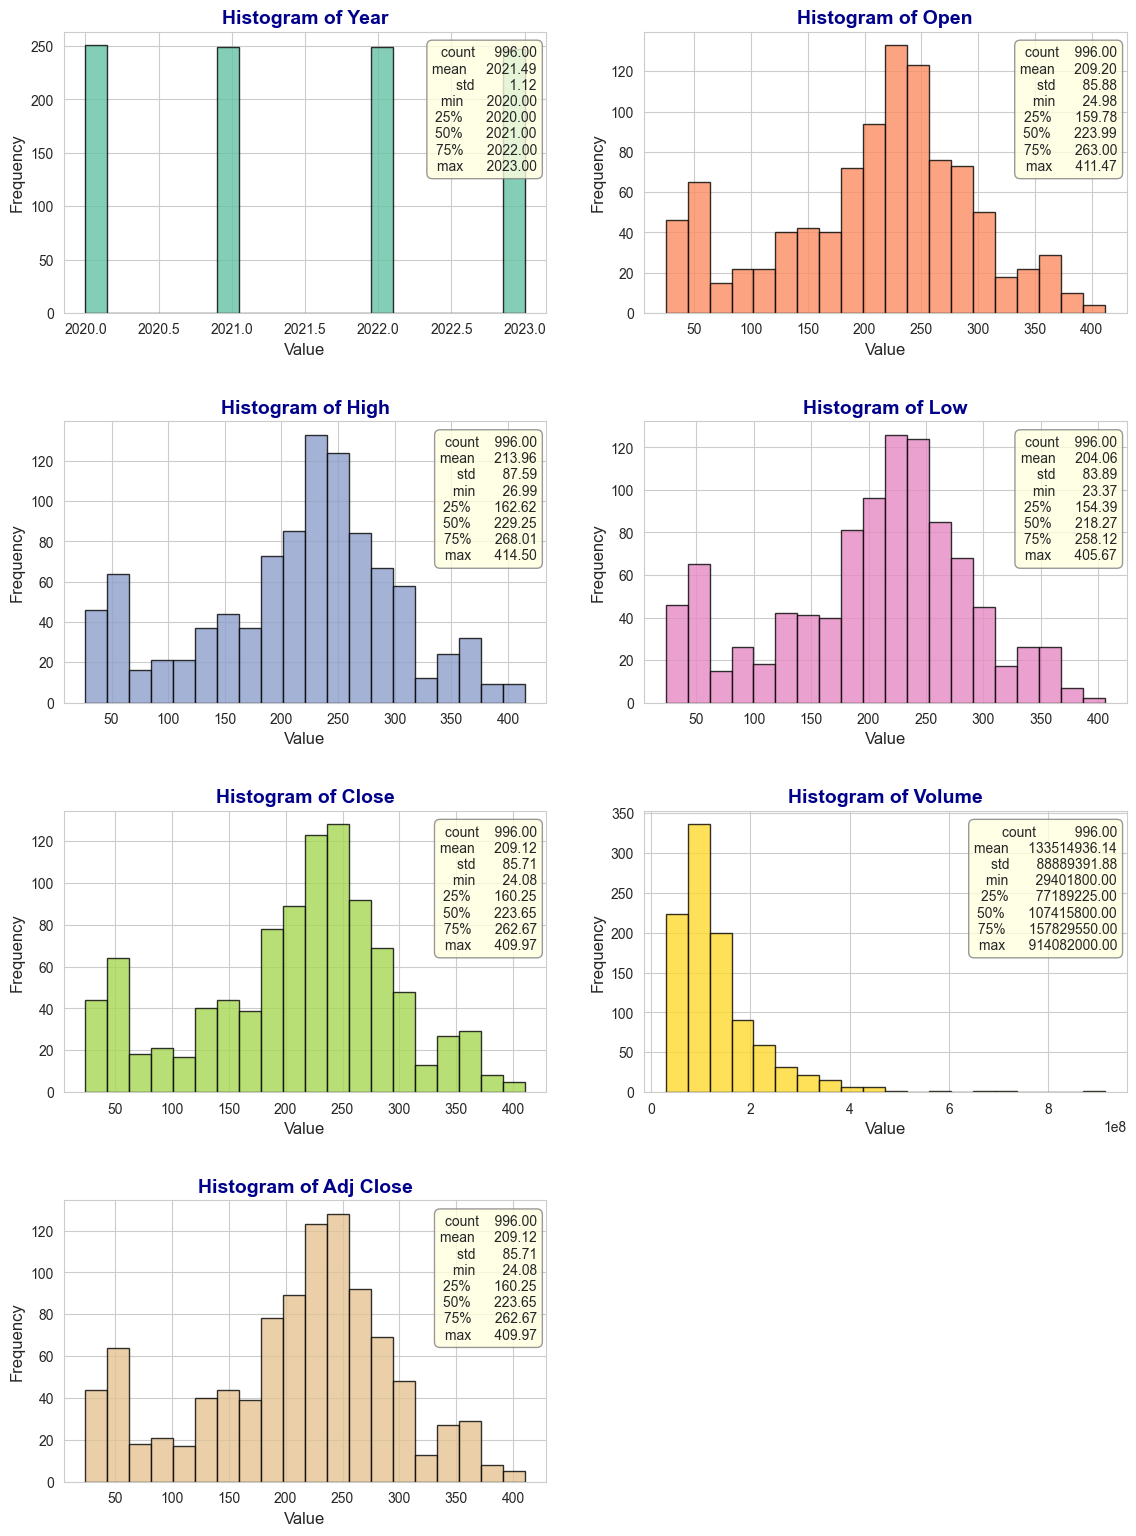

In [6]:
sns.set_style("whitegrid")

# Drop 'Date' column for visualization
columns = tesla_df.drop("Date", axis=1).columns

n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

# Create subplots with larger figure size for readability
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

# Defining color palette for the histograms
colors = sns.color_palette("Set2", len(columns))

# Plot histograms and display summary statistics
for i, column in enumerate(columns):
    ax = axes[i]
    col_data = tesla_df[column]

    # Use a more visually appealing color for histograms
    ax.hist(
        col_data, bins=20, edgecolor="black", color=colors[i % len(colors)], alpha=0.8
    )

    # Set titles and labels with better formatting
    ax.set_title(f"Histogram of {column}", fontsize=14, weight="bold", color="darkblue")
    ax.set_xlabel("Value", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

    # Add summary statistics with improved formatting and placement
    summary_text = tesla_df[column].describe().apply(lambda x: f"{x:.2f}").to_string()
    ax.text(
        0.98,
        0.95,
        summary_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(
            boxstyle="round,pad=0.4",
            facecolor="lightyellow",
            edgecolor="gray",
            alpha=0.8,
        ),
    )

# Remove unused subplots
for ax in axes[len(columns) :]:
    fig.delaxes(ax)

plt.tight_layout(pad=3.0)
plt.show()

### <center>Checking for Outliers</center>


> The box plot shows that there are no outliers in the dataset. Except the column Volume.

- Number of outliers in the volume column: 65
- Name: Volume, Length: 65, dtype: int64


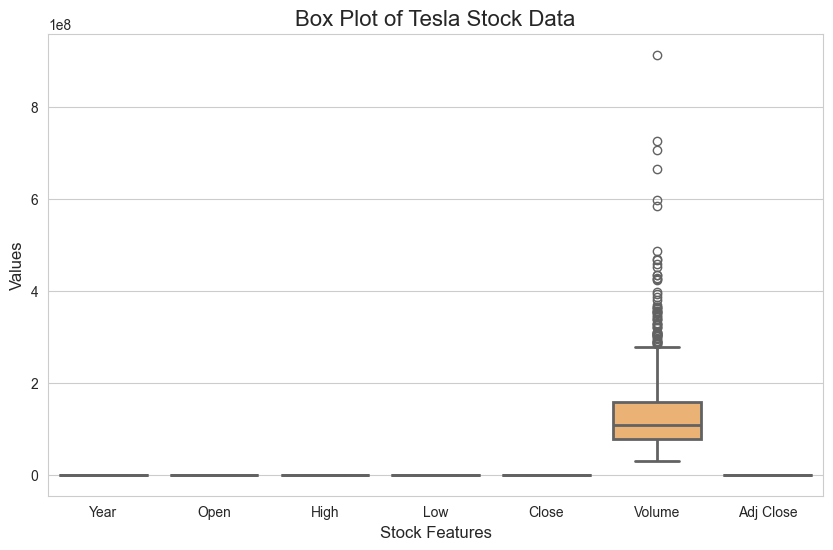

In [7]:
# Drop 'Date' column for plotting purposes
tesla_df_temp = tesla_df.drop("Date", axis=1)

# Create a figure to plot multiple box plots
plt.figure(figsize=(10, 6))

# Create the box plot using seaborn
sns.boxplot(data=tesla_df_temp, palette="Set3", linewidth=2)

# Customize the plot
plt.title("Box Plot of Tesla Stock Data", fontsize=16)
plt.xlabel("Stock Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

plt.show()

##### <center>Detect Outliers using IQR Method</center>


> The "Volume" column appears to have outliers, so utilizing scatter plots would be effective for plotting individual data points and visually identifying those outliers.


In [8]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

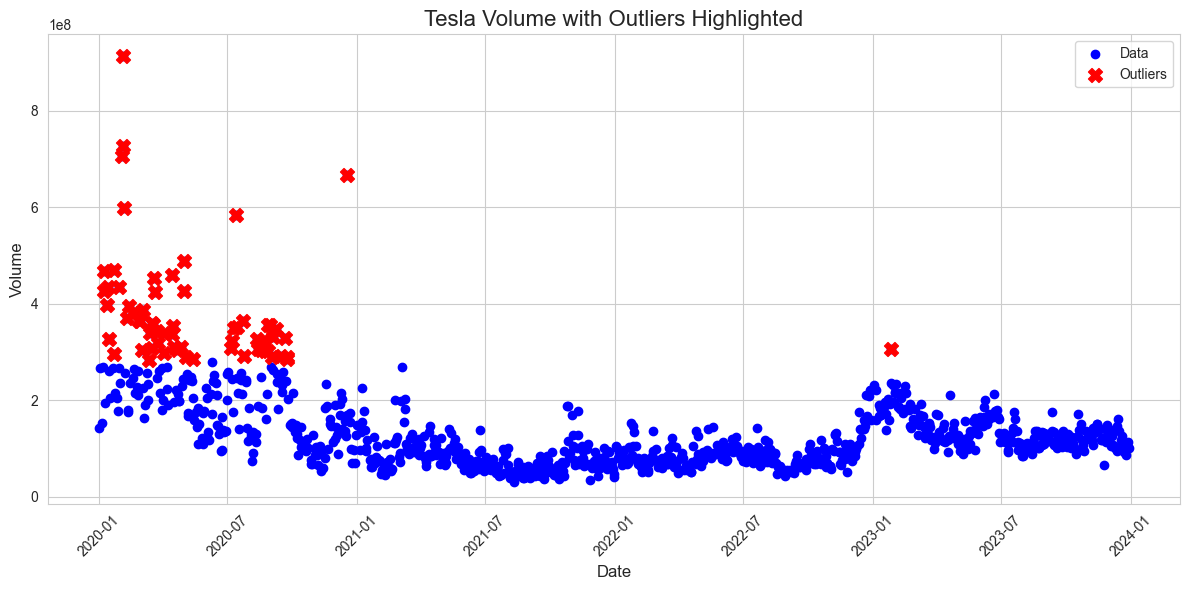

In [31]:
tesla_df_copy = tesla_df.copy()

tesla_df_copy["Date"] = pd.to_datetime(tesla_df_copy["Date"])

# Detect outliers in 'Volume' column
outliers = detect_outliers_iqr(tesla_df_copy, "Volume")

# Plot data and outliers
plt.figure(figsize=(12, 6))
plt.scatter(tesla_df_copy["Date"], tesla_df_copy["Volume"], label="Data", color="blue")
plt.scatter(
    outliers["Date"],
    outliers["Volume"],
    label="Outliers",
    color="red",
    marker="X",
    s=100,
)

# Customize plot
plt.title("Tesla Volume with Outliers Highlighted", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [10]:
# Detect and display outliers for each column
for column in tesla_df_copy:
    outliers = detect_outliers_iqr(tesla_df_copy, column)
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)
    else:
        print(f"No outliers found in {column}.")

No outliers found in Date.
No outliers found in Year.
No outliers found in Open.
No outliers found in High.
No outliers found in Low.
No outliers found in Close.
Outliers in Volume:
          Date  Year        Open        High         Low       Close  \
4   2020-01-08  2020   31.580000   33.232666   31.215334   32.809334   
5   2020-01-09  2020   33.139999   33.253334   31.524668   32.089333   
7   2020-01-13  2020   32.900002   35.042000   32.799999   34.990665   
8   2020-01-14  2020   36.284000   36.493999   34.993332   35.861332   
10  2020-01-16  2020   32.916668   34.297333   32.811333   34.232666   
..         ...   ...         ...         ...         ...         ...   
180 2020-09-21  2020  151.043335  151.893326  135.690002  149.796661   
182 2020-09-23  2020  135.053329  137.383331  125.293335  126.786667   
183 2020-09-24  2020  121.266670  133.166672  117.099998  129.263336   
242 2020-12-18  2020  222.966660  231.666672  209.513336  231.666672   
765 2023-01-27  2023  162.

### <center>Time Frame of the Dataset</center>


**Observation**

- This dataset consists of record of stockprices of Tesla of year 2020-2023.
- And it consists of record of Tesla stock price from 2020-01-02-2023-12-29.
- There are total 1457 days record of Tesla stock prices are present in this dataset.


In [11]:
# Lets find the starting and ending date of the dataset
starting_date = tesla_df_copy["Date"].min()
ending_date = tesla_df_copy["Date"].max()
# Lets check the Format of dates
starting_date_formatted = starting_date.strftime("%Y-%m-%d")
ending_date_formatted = ending_date.strftime("%Y-%m-%d")
# print the starting and ending date
print("Starting date is:", starting_date_formatted)
print("Ending date is:", ending_date_formatted)

print(
    f"Total days in this dataset which represents the stock price are: {(tesla_df_copy.Date.max()-tesla_df_copy.Date.min()).days}days"
)

Starting date is: 2020-01-02
Ending date is: 2023-12-29
Total days in this dataset which represents the stock price are: 1457days


> To visualize the time frame of the dataset and see how the data is distributed over time, We created a timeline plot showing the count of records over time. This will help us understand the coverage and gaps in the data.


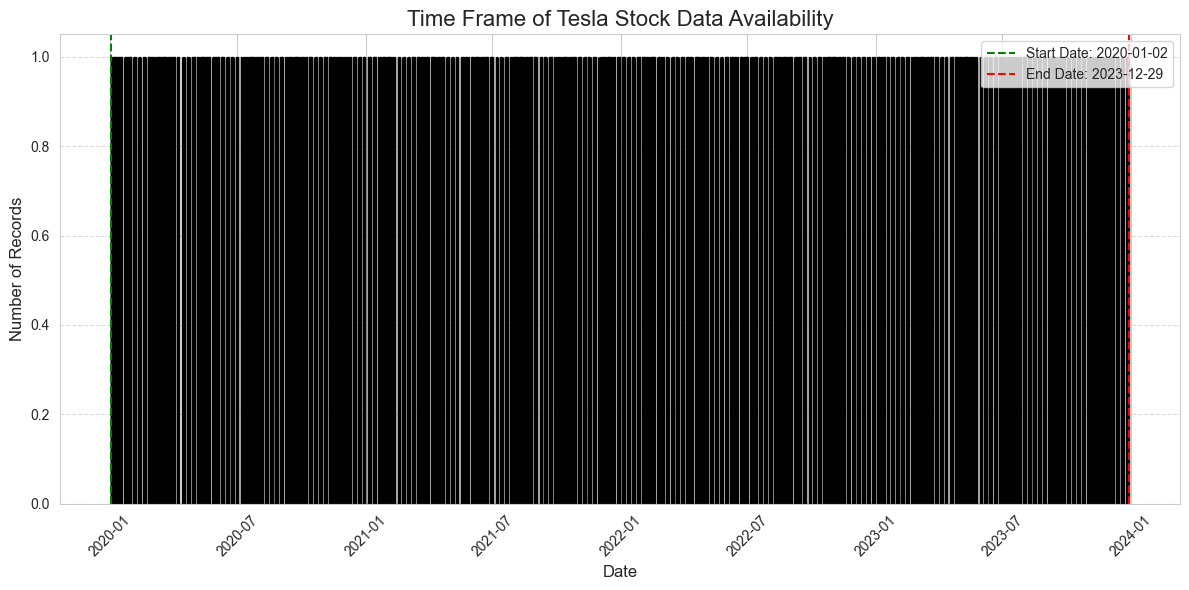

In [12]:
tesla_df_copy2 = tesla_df_copy.copy()

# Set 'Date' as the index
tesla_df_copy2.set_index("Date", inplace=True)

# Resample to daily frequency and count records
df_resampled = tesla_df_copy2.resample("D").size()

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the number of records per day
plt.bar(df_resampled.index, df_resampled, color="blue", edgecolor="black")

# Highlight the time frame
start_date = tesla_df_copy2.index.min()
end_date = tesla_df_copy2.index.max()
plt.axvline(
    x=start_date,
    color="green",
    linestyle="--",
    label=f"Start Date: {start_date.date()}",
)
plt.axvline(
    x=end_date, color="red", linestyle="--", label=f"End Date: {end_date.date()}"
)

# Customize the plot
plt.title("Time Frame of Tesla Stock Data Availability", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### <center>Interactive Line Plot for Opening Prices</center>


**Observations**

- The opening stock prices of Tesla were relatively low on January 2, 2020, and have shown a continuous increase over time.
  On November 4, 2021, the opening stock price of Tesla reached its peak at 411.47, according to this dataset.
- The lowest opening stock price for Tesla was recorded on January 6, 2023, at 103.
- The price then saw an increase again on February 15, 2023, by 211.76.
- After a decrease on April 27, 2023, the price increased once more on July 19, 2023, by 294.04.


In [16]:
# Create interactive line plot
fig = go.Figure()

# Add trace for closing prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy["Date"],
        y=tesla_df_copy["Open"],
        mode="lines+markers",
        name="Opening Price",
        marker=dict(color="blue"),
        line=dict(width=2),
    )
)

# Customize layout
fig.update_layout(
    title="Tesla Opening Prices Over Time",
    xaxis_title="Date",
    yaxis_title="Opening Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### <center>Interactive Line Plot for Closing Prices</center>


**Observations**

- The closing stock price of Tesla is very low at Jan 2,2020 by 28.768 and then on March 18,2020 its also the lowest by 24.08.
- Then it increases with time and the Highest closing stock price of Tesla is at Nov 4,2021 by 409.97.
- At Dec 27,2022 it then decreased greatly by 109.1.
- Then it increases with time and the Highest closing stock price of Tesla is at July 18,2023 by 293.34 and then it decreased again.


In [15]:
# Create interactive line plot
fig = go.Figure()

# Add trace for closing prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy["Date"],
        y=tesla_df_copy["Close"],
        mode="lines+markers",
        name="Closing Price",
        marker=dict(color="red"),
        line=dict(width=2),
    )
)

# Customize layout
fig.update_layout(
    title="Tesla Closing Prices Over Time",
    xaxis_title="Date",
    yaxis_title="Closing Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### <center>Interactive OHLC (Open, High, Low, Close) chart</center>


> OHLC (Open, High, Low, Close) chart is a great way to visualize stock price movements.

**Observations**

- This OHLC chart provides a clear visualization of Tesla's stock prices, including all relevant information (open, high, low, close) when hovered over each data point.
- The OHLC chart represents that the highest stock closing 409.97 and opening price 411.47 of Tesla is at at Nov 4,2021.
- It also represents that the lowest closing and opening price of Tesla is at jan 6,2023 by 103 according to this Dataset.


In [17]:
# Create OHLC chart
fig = go.Figure()

# Add OHLC trace
fig.add_trace(
    go.Ohlc(
        x=tesla_df_copy["Date"],
        open=tesla_df_copy["Open"],
        high=tesla_df_copy["High"],
        low=tesla_df_copy["Low"],
        close=tesla_df_copy["Close"],
        name="OHLC",
    )
)

# Customize layout
fig.update_layout(
    title="Tesla OHLC Chart",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

fig.show()

### <center>Yearly Opening and Closing Prices of Tesla Stock</center>


**Observation**

**2020**

- Opening Price- Very low compared to other years.
- Closing Price- Much higher than the opening price, showing a big gain for Tesla.

**2021**

- Opening and Closing Prices: Both are much higher than in 2020.
- Closing Price: Slightly higher than the opening price, indicating a positive but smaller gain than in 2020.

**2022**

- Opening Price: The highest among the four years.
- Closing Price: Drops a lot, marking a big loss in Tesla’s stock value.

**2023**

- Opening Price: Lower than in 2022 but higher than in 2020.
- Closing Price: Much higher than the opening price, showing a recovery in Tesla’s stock after the drop in 2022.

**General Insights**

- Tesla’s stock saw a big rise in 2020, followed by moderate growth in 2021.
- There was a sharp decline in 2022, with a big difference between opening and closing prices, possibly due to market or company issues.
- In 2023, the stock seems to be recovering, as shown by the rise in closing prices compared to the opening values.


In [18]:
tesla_df_copy3 = tesla_df_copy.copy()

# Extract year and group by year
tesla_df_copy3["Year"] = tesla_df_copy3["Date"].dt.year
yearly_data = (
    tesla_df_copy3.groupby("Year").agg({"Open": "first", "Close": "last"}).reset_index()
)

# Create interactive bar plot
fig = go.Figure()

# Add bars for Opening Prices
fig.add_trace(
    go.Bar(
        x=yearly_data["Year"],
        y=yearly_data["Open"],
        name="Opening Price",
        marker_color="blue",
    )
)

# Add bars for Closing Prices
fig.add_trace(
    go.Bar(
        x=yearly_data["Year"],
        y=yearly_data["Close"],
        name="Closing Price",
        marker_color="red",
    )
)

# Customize layout
fig.update_layout(
    title="Yearly Opening and Closing Prices of Tesla Stock",
    xaxis_title="Year",
    yaxis_title="Price",
    barmode="group",
    template="plotly_white",
    hovermode="x unified",
)

fig.show()

#### <center>Monthly Opening and Closing Prices of Tesla Stock</center>


**Observation**

**Early 2020**

- Both the opening (blue) and closing (red) prices stayed stable and low, with a bit of growth by mid-2020.

**Mid to Late 2020 Surge**

- From mid-2020 to early 2021, both prices went up a lot, with Tesla’s stock rising quickly and peaking around early 2021.

**2021-2022**

- After peaking, prices went up and down but stayed high, with some short-term drops followed by rebounds. The stock hit another high point around early 2022.

**2022 Decline**

- Prices dropped a lot from mid-2022, continuing into early 2023, with both opening and closing prices going down significantly.

**2023 Recovery**

- There is a slight recovery trend in mid-2023, with both opening and closing prices going up, showing some ups and downs but staying more stable compared to earlier high points.

**Overall Trends**

- Tesla stock showed periods of fast growth, followed by big drops and then recoveries.
- The stock’s ups and downs are shown in several instances where the gap between opening and closing prices is small, indicating minimal changes within those months.


In [19]:
tesla_df_copy4 = tesla_df_copy.copy()

# Extract month and year for grouping
tesla_df_copy4["YearMonth"] = tesla_df_copy4["Date"].dt.to_period("M")

# Group by year and month, then aggregate opening and closing prices
monthly_data = (
    tesla_df_copy4.groupby("YearMonth")
    .agg({"Open": "first", "Close": "last"})
    .reset_index()
)

# Create interactive line plot
fig = go.Figure()

# Add line trace for Opening Prices
fig.add_trace(
    go.Scatter(
        x=monthly_data["YearMonth"].astype(str),
        y=monthly_data["Open"],
        mode="lines+markers",
        name="Opening Price",
        marker=dict(color="blue"),
        line=dict(width=2),
    )
)

# Add line trace for Closing Prices
fig.add_trace(
    go.Scatter(
        x=monthly_data["YearMonth"].astype(str),
        y=monthly_data["Close"],
        mode="lines+markers",
        name="Closing Price",
        marker=dict(color="red"),
        line=dict(width=2),
    )
)

# Customize layout
fig.update_layout(
    title="Monthly Opening and Closing Prices of Tesla Stock",
    xaxis_title="Month",
    yaxis_title="Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m"),
    hovermode="x unified",
)

fig.show()

### <center>Line Chart for high and low prices across the date range</center>


**Observations**

- This line plot clearly shows the high and low prices across the date range, using different colors for clarity.'Green' color for High and 'Red' color for Low.
- The Highest price was on Nov 4,2022 by 414.49.
- The lowest price was on March 18,2020 by 23.3.


In [20]:
# Create line plot
fig = go.Figure()

# Add line trace for High Prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy["Date"],
        y=tesla_df_copy["High"],
        mode="lines+markers",
        name="High Price",
        marker=dict(color="green"),
        line=dict(width=2),
    )
)

# Add line trace for Low Prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy["Date"],
        y=tesla_df_copy["Low"],
        mode="lines+markers",
        name="Low Price",
        marker=dict(color="red"),
        line=dict(width=2),
    )
)

# Customize layout
fig.update_layout(
    title="High and Low Prices of Tesla Stock Over Time",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

fig.show()

### <center>Lagged Variables</center>


> Lagged variables are used in time series analysis to include past values of a variable to predict future values. They help capture patterns and trends over time. For example, in predicting stock prices, lagged variables can show how past prices affect future prices.

**Observations**

- Close Lag 1: This represents the lagged or previous closing price of the asset. "Lag 1" means it is the closing price from the previous day or the previous time period. In other words, it is the value of "Close" shifted or lagged by one time period.


In [21]:
tesla_df_copy5 = tesla_df_copy.copy()

# Create lagged variables
lag = 1  # Specify the lag you want to create
tesla_df_copy5[f"Close_Lag_{lag}"] = tesla_df_copy5["Close"].shift(lag)

# Drop rows with NaN values (caused by shifting)
tesla_df_copy5 = tesla_df_copy5.dropna()

# Create interactive line plot to visualize lagged variables
fig = go.Figure()

# Plot for original Close prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy5["Date"],
        y=tesla_df_copy5["Close"],
        mode="lines+markers",
        name="Close Price",
        marker=dict(color="blue"),
        line=dict(width=2),
    )
)

# Plot for lagged Close prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy5["Date"],
        y=tesla_df_copy5[f"Close_Lag_{lag}"],
        mode="lines+markers",
        name=f"Close Price Lag {lag}",
        marker=dict(color="red"),
        line=dict(width=2, dash="dash"),
    )
)

# Customize layout
fig.update_layout(
    title=f"Close Prices and Lagged Close Prices (Lag = {lag})",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

fig.show()

### <center>Using Seaborn for Static Heatmap</center>


**Observation**

> **Strong Correlations (Values close to 1.00)**

- Open, High, Low, Close, and Adj Close:
  These variables have a perfect positive correlation (1.00) with each other. This means that they move in the same direction, indicating that when the stock opens high, the high, low, close, and adjusted close prices are also high. This is typical for stock prices as they are often tightly linked within the same day or time period.

- Year vs Open, High, Low, Close, Adj Close:
  The correlation between Year and these price-related variables is around 0.48, which is a moderate positive correlation. This suggests a slight upward trend in Tesla’s stock prices over time but not a strong year-to-year consistency.

> **Negative Correlations (Values close to -1.00)**

- Volume vs Price Variables (Open, High, Low, Close, Adj Close):
  Volume shows a moderate negative correlation with stock prices, ranging from -0.63 to -0.65. This indicates that as the volume of trades increases, the prices tend to decrease, and vice versa. High trading volume may coincide with periods of selling pressure, leading to lower prices.
- Volume vs Year:
  There is a weak negative correlation (-0.33) between Volume and Year, implying that the volume of Tesla stock transactions has slightly decreased over time.

**Insights:**

- The perfect correlation among Open, High, Low, Close, and Adj Close indicates these price variables are strongly interconnected.
- The negative correlation between Volume and price-related variables suggests a possible relationship between higher trading volume and price drops, which could reflect volatility or investor reactions.
- The moderate correlation between Year and stock prices points to a gradual increase in Tesla’s stock prices over the years, but not consistently.


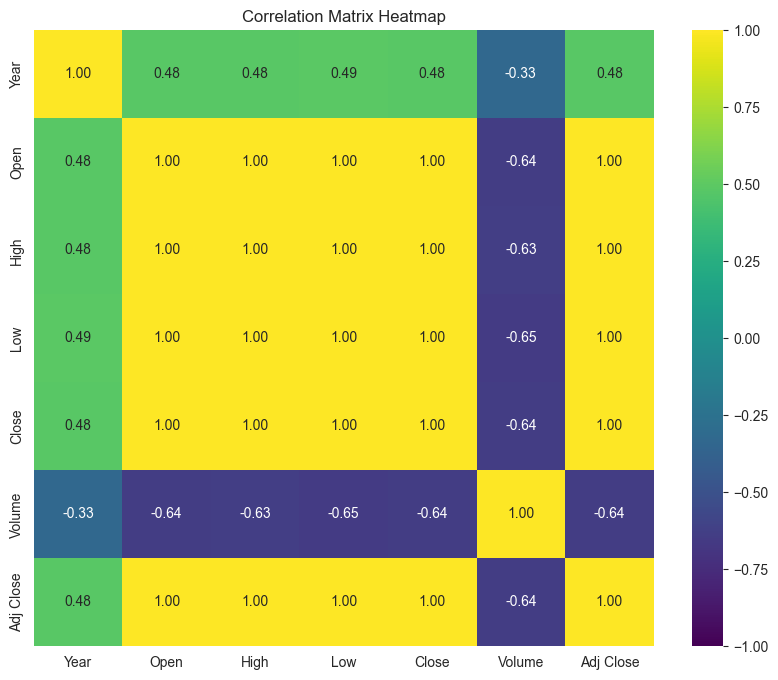

In [22]:
# Calculate the correlation matrix
corr_matrix = tesla_df_temp.corr()

# Create static heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap="viridis", center=0, vmin=-1, vmax=1, fmt=".2f"
)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### <center>Scatter Plot with Regression Line for Volume and Close</center>


> **Key insights:**

**1. Negative Correlation**

- The downward sloping red regression line, with a shaded confidence interval, indicates a negative correlation between Volume and Closing Price. As trading volume increases, the closing price tends to decrease. This supports the earlier observation from the correlation matrix where higher volumes were linked to lower prices.

**2. High Clustering**

- There is a strong concentration of data points in the lower volume range (on the left side of the plot), particularly where volumes are below approximately
  2
  ×
  1
  0
  8
  2×10
  8
  . Most of these points are associated with higher closing prices (above 100).

**3. Outliers**

- A few points show higher volumes with much lower closing prices, falling far below the regression line. These outliers suggest that in rare cases, exceptionally high volumes are associated with extreme drops in closing prices. Some points even show negative closing prices, though these could be data errors or specific adjustments (e.g., for dividends or stock splits).

**4. Steeper Decline at Higher Volumes**

- The regression line suggests that at very high trading volumes (greater than
  4
  ×
  1
  0
  8
  4×10
  8
  ), closing prices tend to decrease more rapidly. The slope is steeper in this region, indicating that these high-volume periods are often marked by strong downward price movements.

**5. Confidence Interval**

- The shaded region around the regression line represents the confidence interval. The wider interval at higher volumes suggests greater uncertainty or variability in the relationship between high volumes and closing prices.

**Overall Conclusion**

- Higher trading volumes are associated with lower closing prices, with the relationship becoming more pronounced as volumes increase. This likely reflects market volatility or selling pressure during periods of high trading activity.


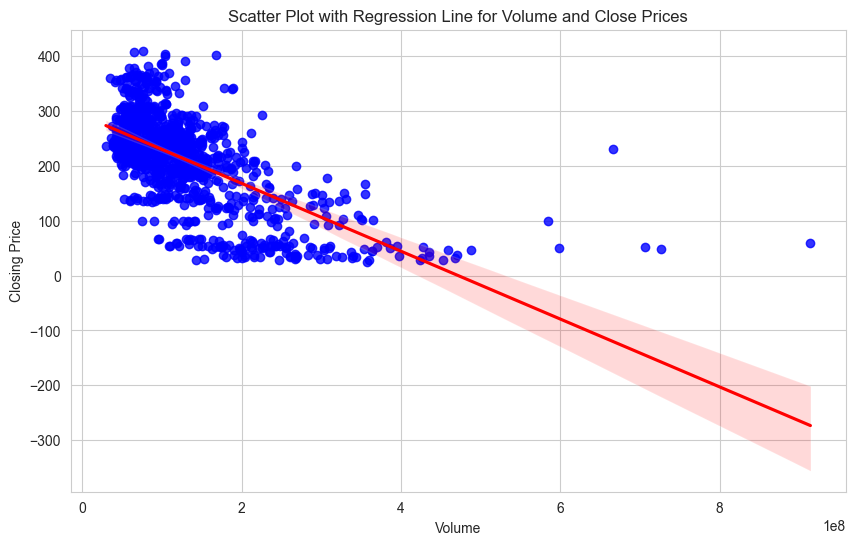

In [23]:
# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x="Volume",
    y="Close",
    data=tesla_df_copy,
    scatter_kws={"color": "blue"},  # Color for scatter points
    line_kws={"color": "red"},  # Color for regression line
)
plt.title("Scatter Plot with Regression Line for Volume and Close Prices")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

### <center>Interactive Candlestick Chart</center>


> Candlestick chart is a way to visualize stock price movements, showing the open, high, low, and close prices over time.


In [24]:
# Create interactive candlestick chart
fig = go.Figure(
    data=[
        go.Candlestick(
            x=tesla_df_copy["Date"],
            open=tesla_df_copy["Open"],
            high=tesla_df_copy["High"],
            low=tesla_df_copy["Low"],
            close=tesla_df_copy["Close"],
            name="Candlestick",
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive Candlestick Chart of Tesla’s Stock",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False,  # Optional: Hide range slider
    template="plotly_white",
)

# Show interactive plot
fig.show()

### <center>Interactive Area Chart of Tesla’s Trading Volume</center>


> **Key Insights**

**High Trading Volume in 2020**

- Tesla’s trading volume spiked in early 2020, with peaks over 800 million shares. This could be due to events like stock splits, company announcements, or increased investor interest.

**Mid to Late 2020 Surge**

- Throughout 2020, Tesla had high trading volumes, with multiple peaks around mid-2020 and the end of 2020. These peaks match Tesla’s stock price surge, showing strong buying and selling activity.

**Gradual Decline in Volume Post-2021**

- From early 2021, trading volume dropped, with fewer and smaller spikes compared to 2020. By mid-2021, trading volume stabilized at lower levels, around 100 to 200 million shares.

**Lower Trading Volume in 2022-2023**

- After the high activity in 2020 and 2021, trading volume was lower in 2022 and 2023, with occasional peaks. The volume stayed below 300 million shares, suggesting less investor activity or fewer big transactions.

**Smaller Volume Spikes in Late 2022 and Early 2023**

- There were a few volume spikes in late 2022 and early 2023, but they were not as big as in previous years. These could be due to market reactions to specific company or economic news.


In [25]:
# Create interactive area chart
fig = go.Figure(
    data=[
        go.Scatter(
            x=tesla_df_copy["Date"],
            y=tesla_df_copy["Volume"],
            mode="lines",
            fill="tozeroy",  # Fill the area under the line
            name="Trading Volume",
            line=dict(color="royalblue"),
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive Area Chart of Tesla’s Trading Volume",
    xaxis_title="Date",
    yaxis_title="Volume",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    yaxis=dict(title="Volume", tickformat=",.0f"),  # Format y-axis with commas
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### <center>Interactive Bar Chart of Tesla’s Daily Price Changes</center>


> Tesla's trading volume over time, highlighting the changes and trends in volume.


In [26]:
tesla_df_copy6 = tesla_df_copy.copy()

# Calculate daily price change
tesla_df_copy6["Price Change"] = (
    tesla_df_copy6["Close"].diff().fillna(0)
)  # Use 0 for the first entry

# Create interactive bar chart
fig = go.Figure(
    data=[
        go.Bar(
            x=tesla_df_copy6["Date"],
            y=tesla_df_copy6["Price Change"],
            marker=dict(
                color=tesla_df_copy6["Price Change"],
                colorscale="Viridis",
                colorbar=dict(title="Price Change"),
            ),
            text=tesla_df_copy6["Price Change"].apply(
                lambda x: f"{x:.2f}"
            ),  # Display price change values
            textposition="auto",
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive Bar Chart of Tesla’s Daily Price Changes",
    xaxis_title="Date",
    yaxis_title="Price Change",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### <center>Interactive Box Plot of Tesla’s Stock Volume</center>


**Volume Distribution**

- Most of Tesla's trading volume is concentrated within a relatively narrow range around 0 to 200 million shares. This can be seen in the box itself, where most data points are tightly packed.

**Spread and Whiskers**

- The whiskers, which represent the range of the data, show that the majority of the trading volume stays below around 200 million shares, with few exceptions.
- The middle 50% of data (within the interquartile range or IQR) is tightly bound, indicating that Tesla’s trading volume doesn't typically vary dramatically.

**Extreme High-Volume Days**

- The points beyond the whiskers and IQR suggest trading days where the volume surged, which could be due to events like earnings releases, product announcements, or significant market news.


In [28]:
# Create interactive box plot
fig = go.Figure(
    data=[
        go.Box(
            y=tesla_df_copy["Volume"],
            boxmean="sd",  # Show mean with standard deviation
            name="Trading Volume",
            marker=dict(
                color="lightblue",
                outliercolor="rgba(219, 64, 82, 0.6)",  # Customize outlier color
                size=10,  # Adjust marker size
            ),
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive Box Plot of Tesla’s Stock Volume",
    yaxis_title="Volume",
    template="plotly_white",
    xaxis=dict(title="Trading Volume"),
)

# Show interactive plot
fig.show()

### <center>Interactive Histogram of Tesla’s Daily Returns</center>


- Most daily returns are close to 0%, meaning Tesla’s stock usually has small price changes. This shows periods of stability.

- The histogram looks like a bell curve, which is common for stock returns. Small returns, both positive and negative, are the most frequent.
  Many days have returns between -2.5% and 2.5%, showing that Tesla’s stock doesn’t often have big daily changes.

- There are fewer extreme returns. The tails of the histogram show some days with large gains (up to +20%) and large losses (down to -20%), but these are rare.
- This means Tesla has had volatile days, but they are less common compared to days with moderate changes.

- The left tail (negative returns) is slightly longer than the right tail (positive returns). This means Tesla’s stock may drop more often than it spikes up significantly.

- The peak of the histogram is just above 0%, with over 200 occurrences, indicating that Tesla’s daily returns often hover around slight positive gains.


In [29]:
# Calculate daily returns
tesla_df_copy["Return"] = (
    tesla_df_copy["Close"].pct_change().fillna(0)
)  # Percentage change, fill NaN with 0

# Create interactive histogram
fig = go.Figure(
    data=[
        go.Histogram(
            x=tesla_df_copy["Return"],
            nbinsx=30,  # Number of bins
            marker=dict(color="blue"),
            opacity=0.7,
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive Histogram of Tesla’s Daily Returns",
    xaxis_title="Daily Return",
    yaxis_title="Frequency",
    template="plotly_white",
    xaxis=dict(tickformat=".2%", title="Daily Return (%)"),
    yaxis=dict(title="Frequency"),
    hovermode="closest",
)

# Show interactive plot
fig.show()

### <center>Interactive 3D Scatter Plot of Tesla’s High, Low, and Closing Prices</center>


> 3D scatter plot will help visualize the relationships between high, low, and closing prices for Tesla, with interactive features for exploring the data in three dimensions.


In [30]:
# Create interactive 3D scatter plot
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=tesla_df_copy["High"],
            y=tesla_df_copy["Low"],
            z=tesla_df_copy["Close"],
            mode="markers",
            marker=dict(
                size=8,
                color=tesla_df_copy["Close"],  # Color by closing price
                colorscale="Viridis",  # Color scale
                colorbar=dict(title="Close Price"),
            ),
            text=tesla_df_copy["Date"].dt.strftime(
                "%Y-%m-%d"
            ),  # Optional: display dates as hover text
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive 3D Scatter Plot of Tesla’s High, Low, and Closing Prices",
    scene=dict(
        xaxis_title="High Price", yaxis_title="Low Price", zaxis_title="Closing Price"
    ),
    template="plotly_white",
    hovermode="closest",
)

# Show interactive plot
fig.show()

<h1><center>THE END</center></h1>
